In [1]:
import sys
import csv
import numpy
import matplotlib
import matplotlib.pyplot as plt
from PIL import Image 
from fpdf import FPDF
import script_automate.train_CNN
import glob
import os

In [2]:
DefaultName = sys.argv[1]
print(DefaultName)
DefaultName = "dig-s0"

-f


In [3]:
#Allgemeine Einstellungen
exec(open("configuration.py").read())

In [4]:
def fig2img(fig, _x = -1, _y = -1):
    import io
    buf = io.BytesIO()
    fig.savefig(buf)
    buf.seek(0)
    img = Image.open(buf) 
    if _x > -1 & _y > -1:
        img = img.resize((_x, _y))
    else:
        if _x > -1:
            width, height = img.size;
            width = int(_x * width);
            height = int(_x * height);
            img = img.resize((width, height))
    return img
    

def fil2file(fig, file):
    import io
    buf = io.BytesIO()
    fig.savefig(buf)
    buf.seek(0)
    img = Image.open(buf)  
    img.save(file,"png")

In [5]:
result = []
result.append(numpy.empty([0]))
result.append(numpy.empty([0]))
result.append(numpy.empty([0]))
result.append(numpy.empty([0]))
result.append(numpy.empty([0]))

loadname = 'training_' + DefaultName + '.txt'

with open(loadname, newline = '') as data:
    data_reader = csv.reader(data, delimiter='\t')
    for line in data_reader:
        datum = line[0]
        anzBilder = line[1]
        lfdnumber = int(line[2])
        loss_eval = float(line[3])
        loss_train = float(line[4])
        result[0] = numpy.append(result[0], datum)
        result[1] = numpy.append(result[1], anzBilder)
        result[2] = numpy.append(result[2], lfdnumber)
        result[3] = numpy.append(result[3], loss_eval)
        result[4] = numpy.append(result[4], loss_train)

#print(result)

In [6]:
pdf = FPDF();
pdf.add_page();
#pdf.unbreakable()
pdf.set_font('Arial', 'B', 20);
pdf.cell(txt=DefaultName);

C:\Users\Muell\anaconda3\envs\anaconda-win11-env\lib\site-packages\fpdf\fpdf.py:1517: UserWarning: Substituting font arial by core font helvetica
  warnings.warn(


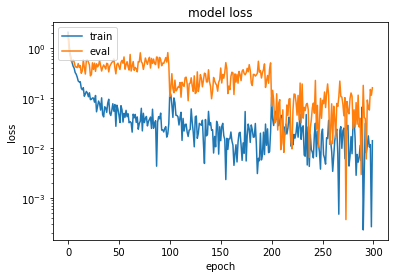

In [7]:
fig, ax = plt.subplots();
plt.semilogy(result[3]);
plt.semilogy(result[4]);

plt.title('model loss');
plt.ylabel('loss');
plt.xlabel('epoch');
plt.legend(['train','eval'], loc='upper left');

pdf.image(fig2img(fig), x=30, y=10, w=150);

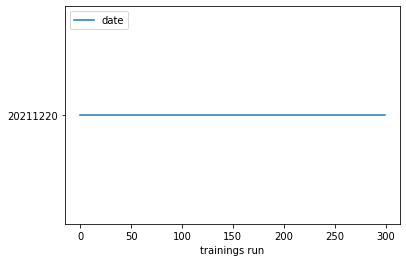

In [8]:
#fig, ax = plt.subplots();
#plt.ioff();
#plt.plot(result[0]);
#plt.xlabel('trainings run');
#plt.legend(['date','eval'], loc='upper left');

#pdf.image(fig2img(fig, 0.9), x=30, y=110, w=150);

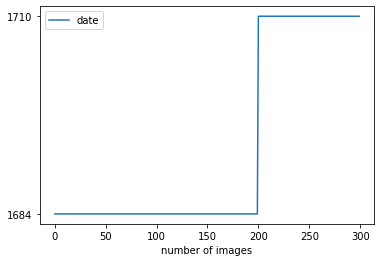

In [9]:
fig, ax = plt.subplots()
plt.plot(result[1])
plt.xlabel('number of images')
plt.legend(['date','eval'], loc='upper left')

pdf.image(fig2img(fig), x=30, y=110, w=150);

In [10]:
pdf.add_page();
pdf.set_font('Arial', '', 12);

C:\Users\Muell\anaconda3\envs\anaconda-win11-env\lib\site-packages\fpdf\fpdf.py:1517: UserWarning: Substituting font arial by core font helvetica
  warnings.warn(


In [11]:
model = script_automate.train_CNN.load_model(DefaultName)

File Exists


In [12]:
actx = pdf.get_x()
acty = pdf.get_y()


Input_dir='ziffer_resize'
res = []
only_deviation = True
show_wrong_image = True

recognition_bad = 0
recognition_good = 0

files = glob.glob(Input_dir + '/*.jpg')
files.sort()

for aktfile in files:
    base = os.path.basename(aktfile)
    target = base[0:1]
    if target == "N":
        zw1 = -1
    else:
        zw1 = int(target)
    expected_class = zw1
    image_in = Image.open(aktfile)
    test_image = numpy.array(image_in, dtype="float32")
    img = numpy.reshape(test_image,[1,target_size_y,target_size_x,3])
    classes = numpy.argmax(model.predict(img), axis=-1)
    classes = classes[0]
    if classes == 10: 
        classes = -1
    zw2 = classes
    zw3 = zw2 - zw1
    res.append(numpy.array([zw1, zw2, zw3]))
    if str(classes) != str(expected_class):
        _zwtxt = aktfile + " " + str(expected_class) +  " " + str(classes)
#        print(aktfile + " " + str(expected_class) +  " " + str(classes))
        if show_wrong_image == True:
            display(image_in)
        recognition_bad = recognition_bad + 1
        pdf.image(image_in)
        actyneu = pdf.get_y()
        pdf.set_y(acty)
        pdf.set_x(30)
        pdf.cell(txt=_zwtxt)
        pdf.ln()
        acty = actyneu
        pdf.set_y(acty)
        pdf.set_x(actx)
    else:
        recognition_good = recognition_good + 1

In [13]:
res = numpy.asarray(res)

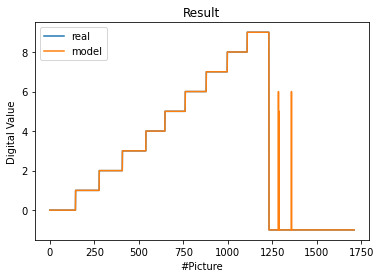

In [14]:
fig, ax = plt.subplots();
plt.plot(res[:,0]);
plt.plot(res[:,1]);
plt.title('Result');
plt.ylabel('Digital Value');
plt.xlabel('#Picture');
plt.legend(['real','model'], loc='upper left');
pdf.image(fig2img(fig), w=150);

In [15]:
pdf.ln()
_zwtxt = "Total number of images:    " + str(recognition_good + recognition_bad)
pdf.cell(txt=_zwtxt)
pdf.ln()
_zwtxt = "Number of bad images:      " + str(recognition_bad)
pdf.cell(txt=_zwtxt)
pdf.ln()
_zwtxt = "Percentage of good images: " + "%.1f" % (100*recognition_good/(recognition_good + recognition_bad)) + "%"
pdf.cell(txt=_zwtxt)

False

In [16]:
pdf.output(DefaultName + ".pdf", 'F')
pdf.output("reports/" + DateNow + "-" + TimeNow + "_" + DefaultName + ".pdf", 'F')
